# EigenFaces - Face Classification in Python

## Imports and Dataset Exploration

In [ ]:
Poisson = True;
light_level = 10;

In [ ]:
import os;
from google.colab import drive
#drive.mount('/content/drive', force_remount=True);
drive.mount('/content/drive');
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/Eigen Face";
os.chdir(path);
os.listdir(path);

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#plt.style.use("seaborn-ticks")

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,...,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,...,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,...,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,...,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830578,0.830578,0.842975,0.838843,0.838843,0.838843,0.830578,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0.797521,0.801653,0.793388,0.793388,...,0.557851,0.574380,0.595041,0.599174,0.611570,0.623967,0.636364,0.669422,0.681818,0.698347,0.698347,0.714876,0.710744,0.764463,0.756198,0.785124,0.797521,0.739669,0.714876,0.681818,0.619835,0.293388,0.144628,0.152893,0.152893,0.157025,0.148760,0.161157,0.161157,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [ ]:
df.shape

(400, 4097)

In [ ]:
df['target'].nunique()

40

In [ ]:
64 * 64

4096

<br><br>

## Image Visualization

In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

<br><br>


## Principal Component Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

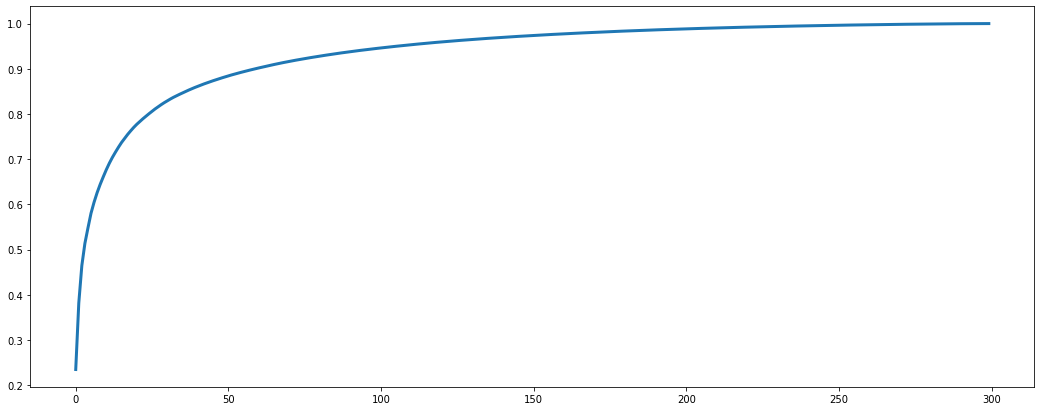

In [ ]:
pca = PCA().fit(X_train)

plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [ ]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
        275, 276, 277, 278, 279, 280, 281, 282, 283

In [ ]:
pca = PCA(n_components=105).fit(X_train)


In [ ]:
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)
print(pca.explained_variance_)

(300, 105)
[18.64724853 11.67980131  6.59741314  3.89654694  2.71023014  2.58512424
  1.93856852  1.67776071  1.46264037  1.31263973  1.26095024  1.14638561
  1.02625916  0.92304689  0.87873737  0.82380924  0.71170722  0.70679745
  0.63637797  0.60579295  0.54466025  0.49720902  0.4735811   0.45462794
  0.43475923  0.42382427  0.41792615  0.38205272  0.37098659  0.34970832
  0.32388823  0.31529397  0.29545757  0.27057592  0.25888569  0.2515089
  0.24770798  0.24520672  0.23279829  0.22541915  0.21327046  0.20632948
  0.20508563  0.1921946   0.18893365  0.18502099  0.17875898  0.1742657
  0.16939512  0.16790858  0.16086014  0.15821453  0.15195164  0.14671032
  0.14307092  0.14163909  0.13741503  0.13328649  0.13302596  0.1289212
  0.12536931  0.12411302  0.12225939  0.12156461  0.11904802  0.11816685
  0.1156097   0.1118939   0.10739528  0.10647567  0.10432564  0.10143482
  0.09869551  0.09734226  0.09604219  0.09197925  0.09091453  0.09015381
  0.08888304  0.0861947   0.08424813  0.083

<br><br>

## Model Training & Evaluation

In [ ]:
classifier = SVC().fit(X_train_pca, y_train)

(poisson(M(X_test)light_level)/light_level - M(X_mean))  
M is the eigen vector

In [ ]:
M = pca.components_;
X_mean = pca.mean_;

light_level_per_mask = 1e6 * 1;


M_positive = np.array(M);
M_positive[np.where(M_positive < 0)] = 0;

M_negative = np.array(M);
M_negative[np.where(M_negative >= 0)] = 0;

X_test_pca = pca.transform(X_test)

light_level = light_level_per_mask / np.sum(M_positive);

#light_level = 1e6 * 1 /105/4096
X_test_pca_poisson_posi = np.random.poisson((X_test).dot(M_positive.T) * light_level)/light_level - M_positive.dot(X_mean);

light_level = light_level_per_mask / np.sum(-M_negative);

#light_level = 1e6 * 1 /105/4096
X_test_pca_poisson_nega = np.random.poisson((X_test).dot(-M_negative.T) * light_level)/light_level - (-M_negative).dot(X_mean);

X_test_pca_poisson = X_test_pca_poisson_posi - X_test_pca_poisson_nega;

#X_test_pca_min = np.min(X_test_pca);



#X_test_pca_poisson = np.random.poisson((X_test_pca - X_test_pca_min)*light_level)/light_level + X_test_pca_min ;
predictions = classifier.predict(X_test_pca_poisson)

'''
###########################################################################
light_level = 1e6 * 10 / 64**2;
X_test_poisson = np.random.poisson(X_test * light_level)/light_level;
X_test_poisson_pca = pca.transform(X_test_poisson) 

predictions = classifier.predict(X_test_poisson_pca)'''

'\n###########################################################################\nlight_level = 1e6 * 10 / 64**2;\nX_test_poisson = np.random.poisson(X_test * light_level)/light_level;\nX_test_poisson_pca = pca.transform(X_test_poisson) \n\npredictions = classifier.predict(X_test_poisson_pca)'

In [ ]:
print(pca.components_);
print(pca.mean_)

[[ 0.00435687  0.00749527  0.00965631 ...  0.00159943 -0.00146594
  -0.00102124]
 [-0.02763553 -0.0324329  -0.03701251 ...  0.03061356  0.02772316
   0.02484575]
 [ 0.00417394  0.00156163  0.00019617 ... -0.01500964 -0.01287699
  -0.01091634]
 ...
 [ 0.02353531  0.00490238 -0.01768257 ...  0.00125164 -0.00403516
   0.0150884 ]
 [ 0.00060677 -0.0264489  -0.01138665 ... -0.06375384 -0.01791252
  -0.00086478]
 [-0.01866904 -0.0207995   0.01953204 ... -0.01071707  0.0071462
  -0.0261559 ]]
[0.39606061 0.42863637 0.47114325 ... 0.32741047 0.31874656 0.31409091]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       1.00      0.80      0.89         5
          17       1.00      1.00      1.00         4
          18       1.00    

In [ ]:
print(sum(np.array(y_test) == np.array(predictions))/len(y_test))

0.91


In [ ]:
print(np.sum(M_positive))

2639.572070337645


In [ ]:
M_positive.shape

(105, 4096)

In [ ]:
light_level

387.5907772413111